Do you think you may have the data you need to tackle the desired question?
Have you identified the required target value?
Do you have potentially useful features?
Do you have any fundamental issues with the data?

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df= pd.read_csv('Documents/GitHub/CapstoneTwo/Life_Expectancy_Data.csv')

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
[x for x in df.columns if x.endswith(' ') or x.startswith(' ')]

['Life expectancy ',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Diphtheria ',
 ' HIV/AIDS',
 ' thinness  1-19 years',
 ' thinness 5-9 years']

In [7]:
df.columns = df.columns.str.strip()

In [8]:
[x for x in df.columns if x.endswith(' ') or x.startswith(' ')]

[]

In [9]:
df.columns = df.columns.str.lower()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life expectancy                  2928 non-null   float64
 4   adult mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   hepatitis b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  polio               

Our column of interest is 3, life expectancy. Everything is a float or int except for country.

In [18]:
df.sort_values(by='country')
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
country,0,0.000000
year,0,0.000000
status,0,0.000000
infant deaths,0,0.000000
percentage expenditure,0,0.000000
measles,0,0.000000
hiv/aids,0,0.000000
under-five deaths,0,0.000000
life expectancy,10,0.340368
adult mortality,10,0.340368


Some preliminary visualization of the variables, before dropping None or filling them in.

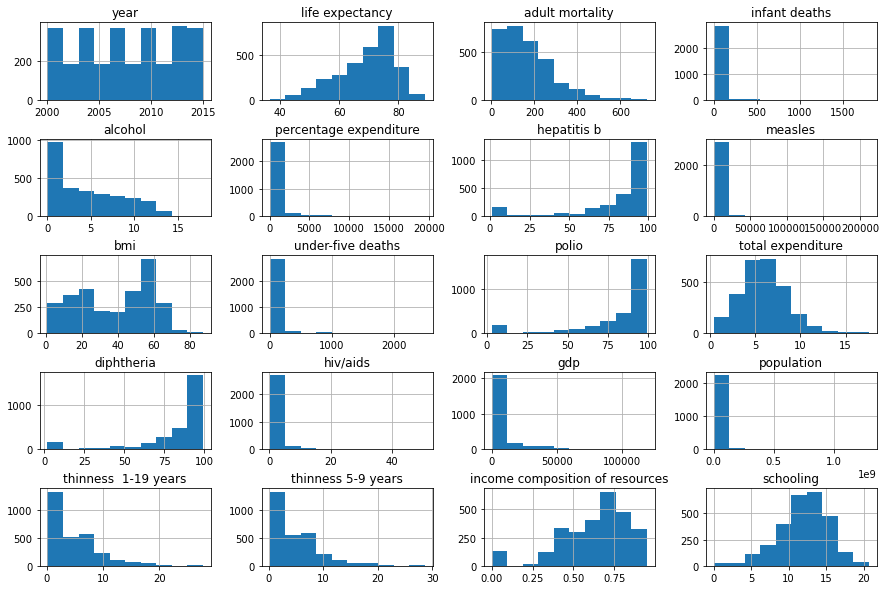

In [12]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

<AxesSubplot:>

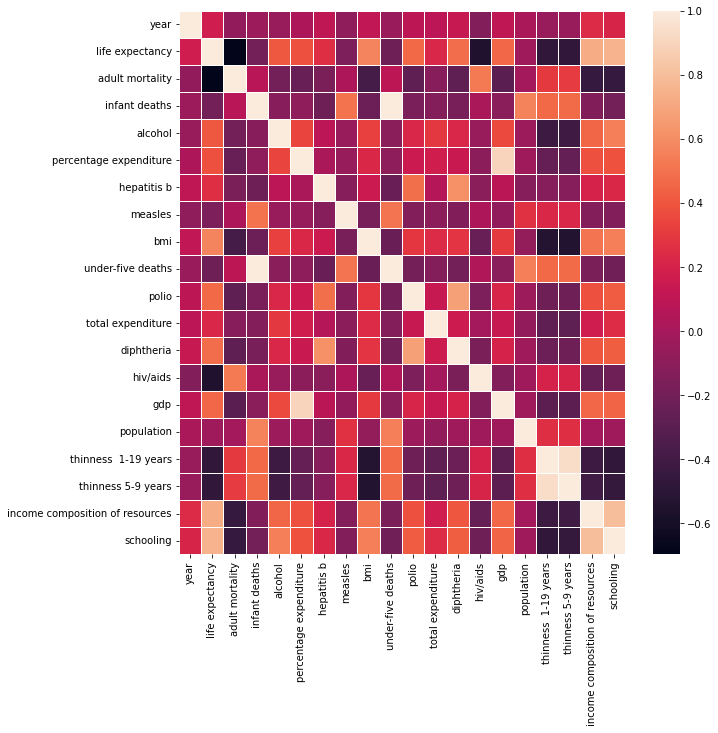

In [13]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, linewidths=.5, ax=ax)

I see that infant deaths and under-five deaths are correlated, which makes sense. As well as thinness for overlapping age groups and GDP and percentage expenditure. BMI is inversely correlated with thinness. Mortality and AIDS are inversely correlated with Life Expectancy. All to be expected.

In [14]:
df.isna()

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,...,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


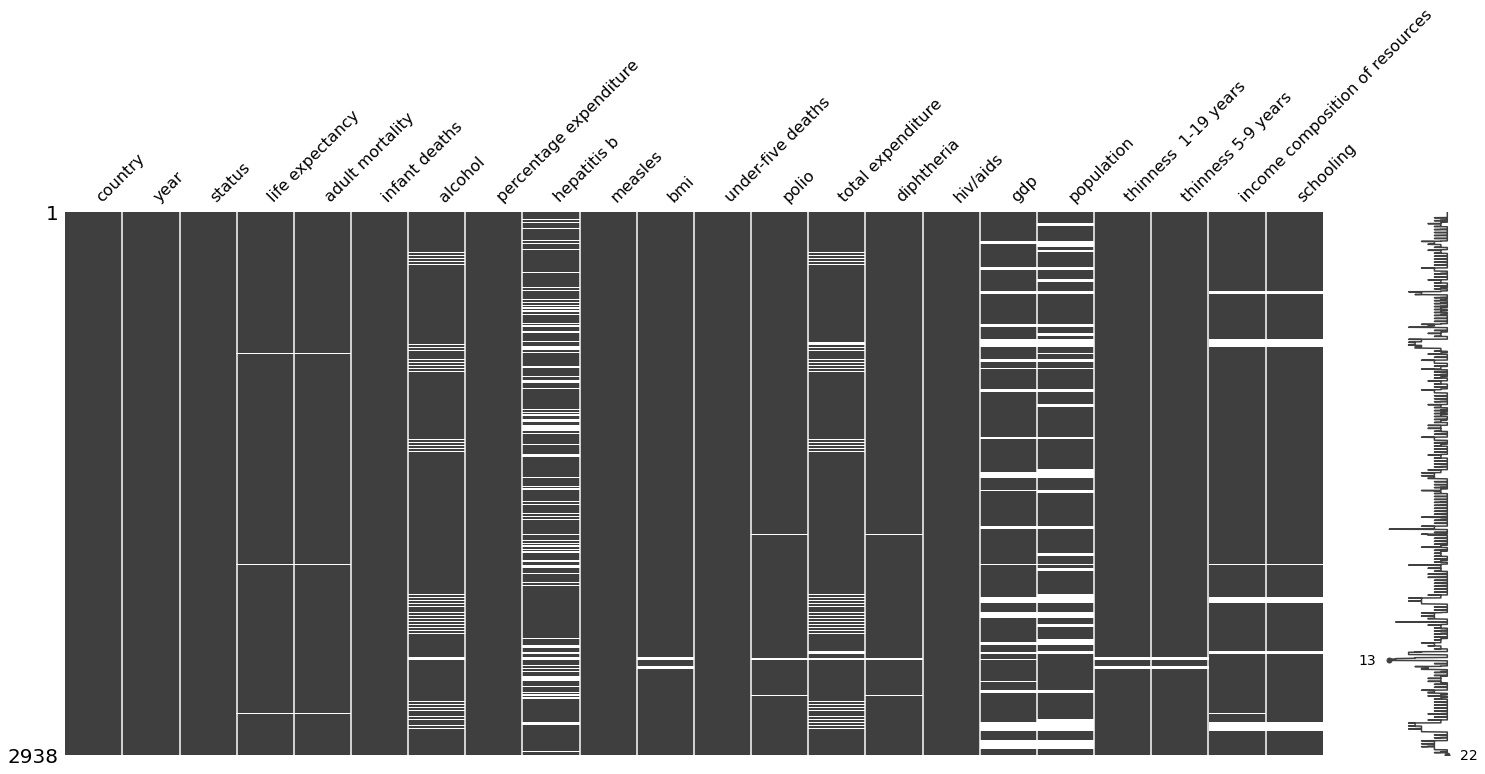

In [19]:
msno.matrix(df)
plt.show()

Doesn't make sense to fill in population with an overall average because countries are all different.

In [21]:
completealcohol=df[~df['alcohol'].isna()]
missingalcohol=df[df['alcohol'].isna()]

In [22]:
missingalcohol.describe()

,year,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
count,194.000000,193.000000,193.000000,194.000000,0.0,194.000000,171.000000,194.000000,177.000000,194.000000,182.000000,5.00000,182.000000,194.000000,158.000000,1.560000e+02,177.000000,177.000000,185.000000,185.000000
mean,2014.319588,70.019171,169.585492,24.273196,NaN,5.174513,82.391813,1432.659794,42.779096,32.737113,82.532967,5.17200,83.780220,0.908247,6649.883593,1.019419e+07,4.523164,4.566102,0.642465,11.926486
std,2.549190,9.115748,109.452302,81.175193,NaN,45.383467,24.148895,7622.318352,20.838758,104.580276,24.508574,3.38384,22.707266,1.541426,10990.636165,2.767789e+07,4.008241,4.089910,0.220503,4.230698
min,2000.000000,48.900000,1.000000,0.000000,NaN,0.000000,6.000000,0.000000,2.500000,0.000000,5.000000,2.62000,6.000000,0.100000,33.681223,2.920000e+02,0.100000,0.100000,0.000000,0.000000
25%,2015.000000,63.500000,81.000000,0.000000,NaN,0.000000,79.500000,0.000000,24.300000,0.000000,79.500000,2.74000,81.250000,0.100000,778.923541,2.771510e+05,1.600000,1.500000,0.514000,10.300000
50%,2015.000000,72.700000,147.000000,3.000000,NaN,0.000000,93.000000,9.000000,48.600000,4.000000,93.000000,2.77000,93.000000,0.100000,2634.401577,1.784496e+06,3.500000,3.400000,0.701000,12.800000
75%,2015.000000,76.200000,241.000000,26.000000,NaN,0.000000,97.000000,204.000000,61.400000,38.000000,97.000000,8.46000,97.000000,0.700000,6516.606162,8.790661e+06,6.500000,6.400000,0.792000,14.600000
max,2015.000000,88.000000,484.000000,910.000000,NaN,527.307672,99.000000,90387.000000,83.300000,1100.000000,99.000000,9.27000,99.000000,9.300000,66346.522670,2.581621e+08,26.700000,27.300000,0.938000,20.400000


Compared with below, completealcohol has higher infant deaths, higher measles, higher BMI, higher under 5 deaths, higher GDP, similar everything else.

In [23]:
completealcohol.describe()

,year,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
count,2744.000000,2735.000000,2735.000000,2744.000000,2744.000000,2744.000000,2214.000000,2744.000000,2727.000000,2744.000000,2737.000000,2707.000000,2737.000000,2744.000000,2332.000000,2.130000e+03,2727.000000,2727.000000,2586.000000,2590.000000
mean,2007.037901,69.168885,164.458501,30.730321,4.602861,790.079610,80.828365,2489.368076,38.031903,42.693149,82.551334,5.939605,82.227256,1.801057,7539.615343,1.294081e+07,4.860249,4.890062,0.626484,11.997529
std,4.339748,9.551114,125.283817,120.099224,4.052413,2047.061009,25.141540,11689.179243,19.960934,163.668435,23.359095,2.497023,23.783353,5.233321,14465.635645,6.276104e+07,4.445507,4.534719,0.210204,3.288789
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.100000,73.000000,0.000000,0.877500,10.656099,77.000000,0.000000,19.000000,0.000000,78.000000,4.265000,78.000000,0.100000,453.200736,1.920008e+05,1.600000,1.500000,0.492000,10.100000
50%,2007.000000,72.000000,144.000000,3.000000,3.755000,81.021831,92.000000,17.000000,43.100000,4.000000,93.000000,5.760000,93.000000,0.100000,1730.561939,1.363050e+06,3.300000,3.300000,0.676000,12.300000
75%,2011.000000,75.600000,227.000000,22.000000,7.702500,491.637225,96.750000,375.000000,55.900000,27.000000,97.000000,7.490000,97.000000,0.800000,5864.405912,7.335094e+06,7.200000,7.300000,0.778000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


What kind of missing data is this? Missing completely at random, missing at random, etc.

<AxesSubplot:>

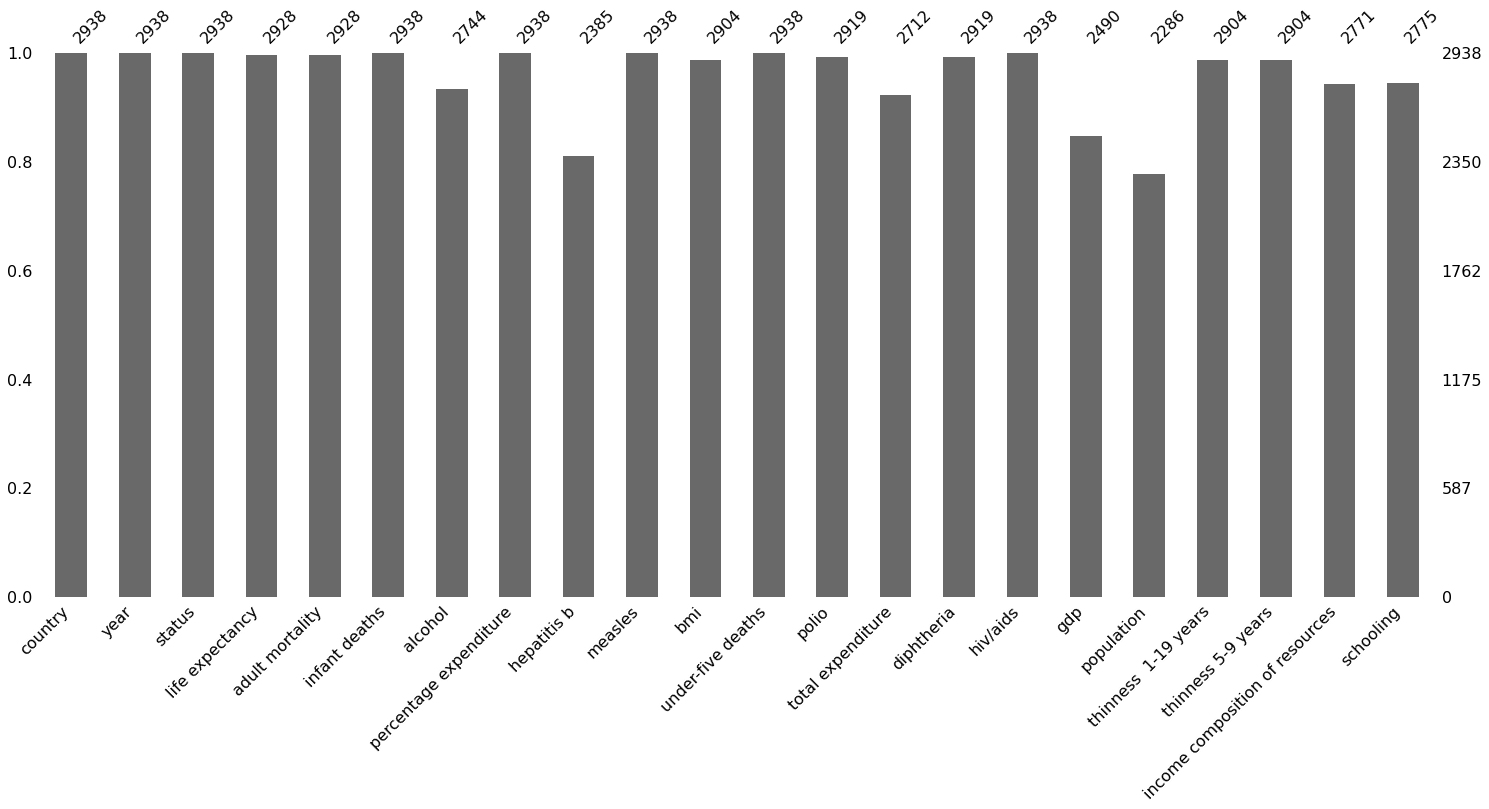

In [16]:
msno.bar(df)

<AxesSubplot:>

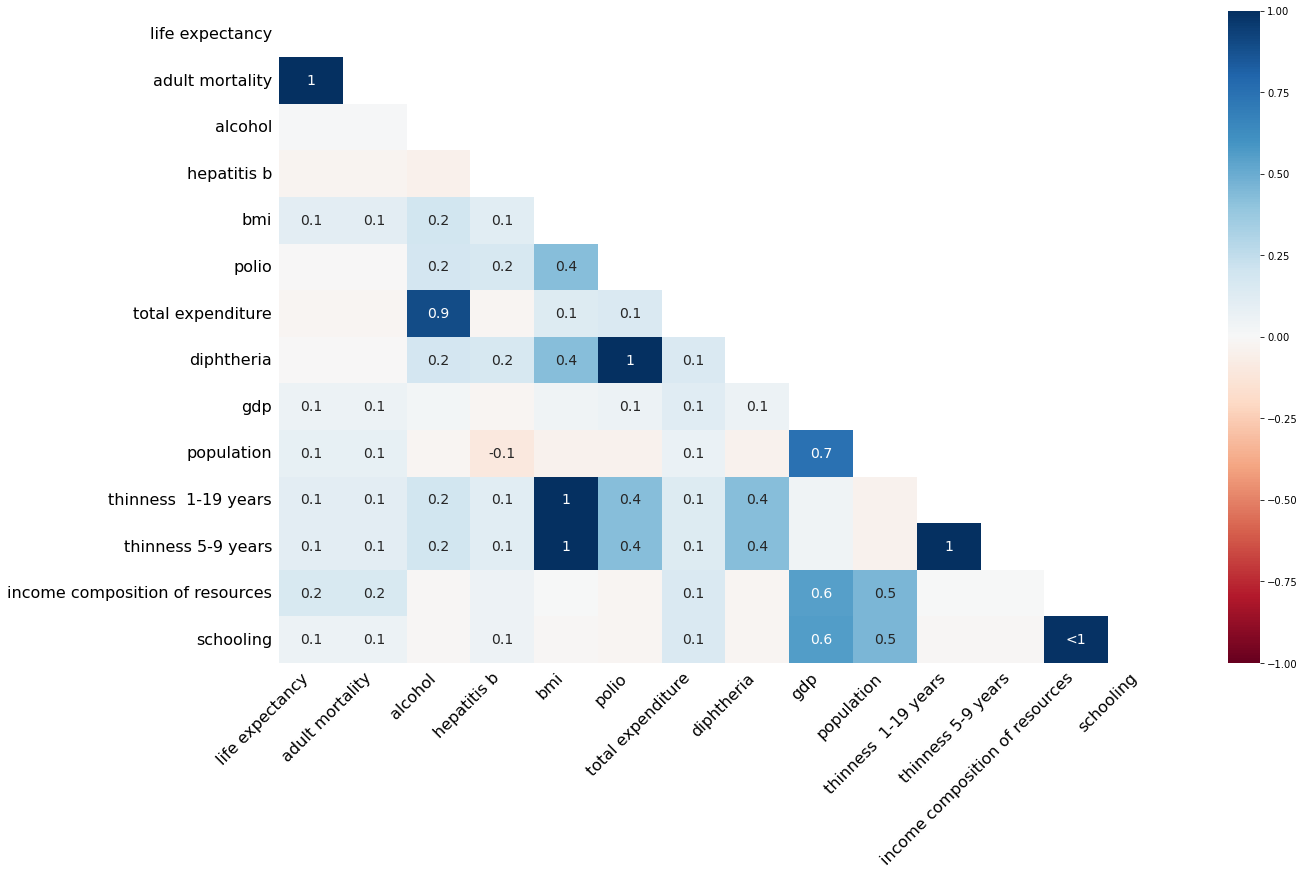

In [24]:
msno.heatmap(df)

<AxesSubplot:>

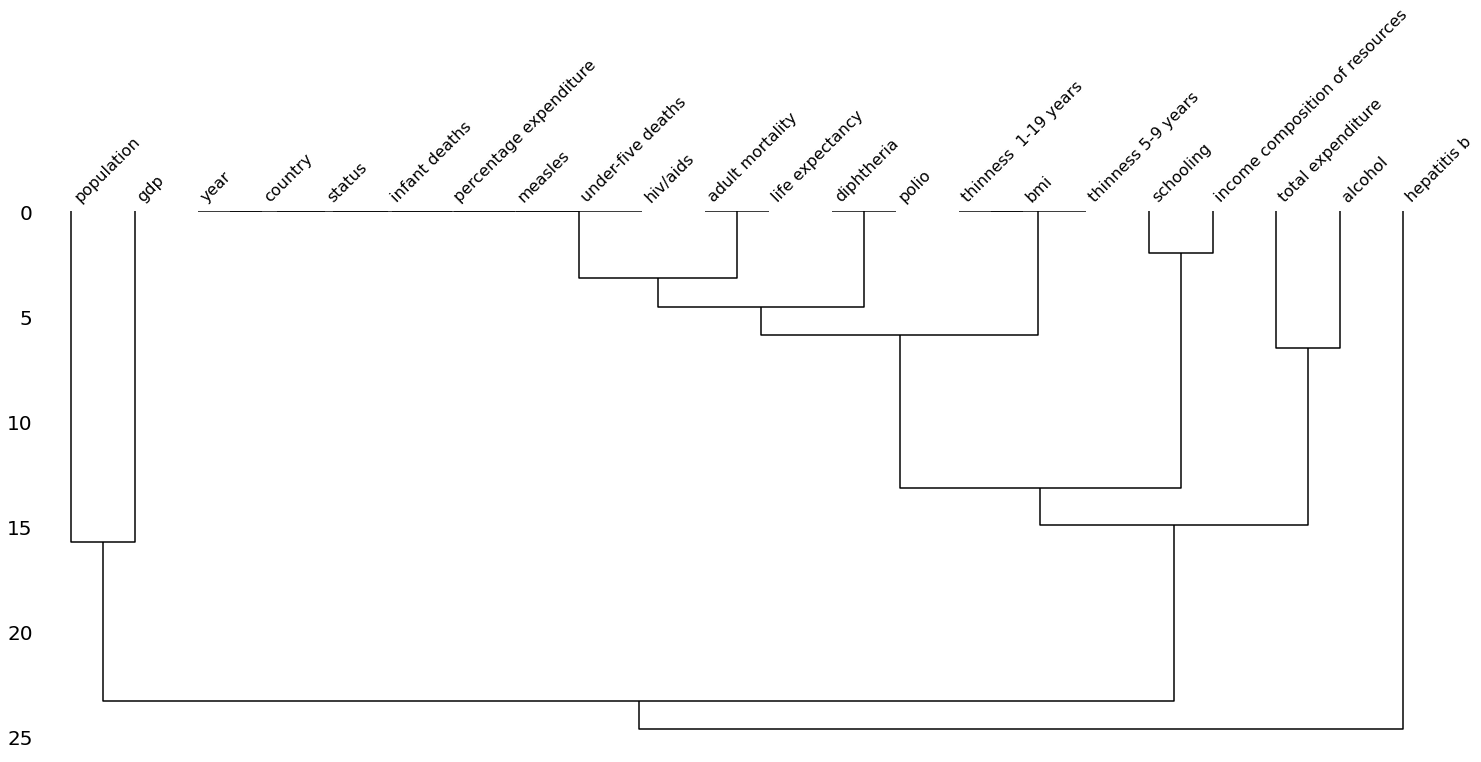

In [26]:
msno.dendrogram(df)

In [17]:
#df = df.dropna() 

# If there is a missing or empty observation, delete it. 
#Or 'data.fillna(data.mean(), inplace=True)' with this make NaN values take mean

#lindata = df.copy()
#multidata = df.copy()
#polydata = df.copy()
#RFdata = df.copy()
#logdata = df.copy()

How is life expectancy currently computed or recorded? 

https://cdn.who.int/media/docs/default-source/gho-documents/global-health-estimates/ghe2019_life-table-methods.pdf?sfvrsn=c433c229_5